# Group 4 Assignment

Product taken- Uber App

Group Members::

ARINDAM DEY – B2022069

ARITRA PAL – B2022070

PRIYESHA KAPADIA – B2022094

SHIRSA MITRA – B2022105

SNEHA SEN – B2022112

SOUVIK DAS – B2022113


In [126]:
import pandas as pd
import nltk
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition
import numpy as np
import re
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.model_selection import train_test_split
import os
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
import os
import pandas as pd

# Set the directory path where the Excel files are located
directory_path = "C:/Users/Sneha/Documents/NLP_Uber"

# Create an empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Loop through all the files in the directory
for file_name in os.listdir(directory_path):
    # Check if the file is an Excel file
    if file_name.endswith(".xlsx"):
        # Read the Excel file into a DataFrame
        file_path = os.path.join(directory_path, file_name)
        data = pd.read_excel(file_path)
        # Append the data to the merged_data DataFrame
        merged_data = merged_data.append(data)

# Write the merged data to a new Excel file called "merged_review.xlsx"
merged_data.to_excel(os.path.join(directory_path, "merged_review.xlsx"), index=False)


C:\Users\Sneha\AppData\Local\Temp\ipykernel_24380\1592565095.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data)
C:\Users\Sneha\AppData\Local\Temp\ipykernel_24380\1592565095.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data)
C:\Users\Sneha\AppData\Local\Temp\ipykernel_24380\1592565095.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data)
C:\Users\Sneha\AppData\Local\Temp\ipykernel_24380\1592565095.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data)
C:\Users\Sneha\AppData\Local\Tem

In [3]:
df = pd.read_excel('merged_review.xlsx')
df.head(10)


,Date,Stars,Sentiment,Review
0,29-10-2019,1,Negative,I had an accident with an Uber driver in Mexic...
1,28-10-2019,1,Negative,I have had my account completely hacked to whe...
2,27-10-2019,1,Negative,I requested an 8 mile ride in Boston on a Satu...
3,27-10-2019,1,Negative,I've been driving off and on with the company ...
4,25-10-2019,1,Negative,Uber is overcharging for Toll fees. When In Fl...
5,24-10-2019,1,Negative,I had an airport flight today. Uber would not ...
6,24-10-2019,1,Negative,I worked for Uber and Lyft for 2.5 years and a...
7,23-10-2019,1,Positive,In July of this year I had sushi delivered to ...
8,23-10-2019,1,Negative,"My driver, Rohan was nice, but when I tried to..."
9,21-10-2019,1,Negative,I had seven fraudulent Uber transactions over ...


# Phase 1

# Q1- Overall sentiment of the dataset

In [4]:
# Creating a new column for sentiment scores
df['sentiment_score'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Defining a function to categorize sentiment scores into positive, negative or neutral
def get_sentiment_category(score):
    if score > 0:
        return 'Positive'
    else:
        return 'Negative'
    

# Creating a new column for sentiment categories
df['sentiment_category'] = df['sentiment_score'].apply(get_sentiment_category)

# Printing the overall sentiment of the product
print('Overall sentiment:', df['sentiment_category'].value_counts().idxmax())


Overall sentiment: Positive


In [5]:
df

,Date,Stars,Sentiment,Review,sentiment_score,sentiment_category
0,29-10-2019,1,Negative,I had an accident with an Uber driver in Mexic...,-0.185556,Negative
1,28-10-2019,1,Negative,I have had my account completely hacked to whe...,0.033333,Positive
2,27-10-2019,1,Negative,I requested an 8 mile ride in Boston on a Satu...,0.053333,Positive
3,27-10-2019,1,Negative,I've been driving off and on with the company ...,0.363939,Positive
4,25-10-2019,1,Negative,Uber is overcharging for Toll fees. When In Fl...,-0.016667,Negative
...,...,...,...,...,...,...
2102,2016-02-23 00:00:00,1,Positive,Wow! Where do I begin?! I applied to be a driv...,0.059375,Positive
2103,2016-02-22 00:00:00,2,Positive,The first time ever in my life that I used ...,0.209773,Positive
2104,2016-02-22 00:00:00,4,Negative,Short trip take a cab. Longer run out of town...,0.000000,Negative
2105,2016-02-21 00:00:00,1,Positive,If you are contemplating driving for Uber in N...,0.176061,Positive


In [116]:
new_df=df.copy()

# Creating a new column for sentiment scores
new_df['sentiment_score'] = new_df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Defining a function to categorize sentiment scores into positive, negative or neutral
def get_sentiment_category(score):
    if score > 0:
        return 'Positive'
    else:
        return 'Negative'
    

# Creating a new column for sentiment categories
new_df['sentiment_category'] = new_df['sentiment_score'].apply(get_sentiment_category)

In [118]:
# will be used in Phase 4
new_df

,Date,Stars,Sentiment,Review,Review_new,sentiment_score,sentiment_category
0,29-10-2019,1,Negative,I had an accident with an Uber driver in Mexic...,accid uber driver mexico citi car got side mir...,-0.185556,Negative
1,28-10-2019,1,Negative,I have had my account completely hacked to whe...,account complet hack sign view someon spent 1k...,0.033333,Positive
2,27-10-2019,1,Negative,I requested an 8 mile ride in Boston on a Satu...,request 8 mile ride boston saturday night arou...,0.053333,Positive
3,27-10-2019,1,Negative,I've been driving off and on with the company ...,ive drive compani sinc 2016 sinc drive new pla...,0.363939,Positive
4,25-10-2019,1,Negative,Uber is overcharging for Toll fees. When In Fl...,uber overcharg toll fee florida toll fee estim...,-0.016667,Negative
...,...,...,...,...,...,...,...
2102,2016-02-23 00:00:00,1,Positive,Wow! Where do I begin?! I applied to be a driv...,wow begin appli driver wait wait waitedwait co...,0.059375,Positive
2103,2016-02-22 00:00:00,2,Positive,The first time ever in my life that I used ...,first time ever life use uber chitown new year...,0.209773,Positive
2104,2016-02-22 00:00:00,4,Negative,Short trip take a cab. Longer run out of town...,short trip take cab longer run town airport uber,0.000000,Negative
2105,2016-02-21 00:00:00,1,Positive,If you are contemplating driving for Uber in N...,contempl drive uber nj think againmayb 3x ask ...,0.176061,Positive


# Q2

Collecting all positive sentiments

In [6]:
# create a new dataframe with only positive sentiment sentences-
positive_df = df.loc[df['sentiment_score'] > 0, ['Date', 'Stars', 'Sentiment','Review','sentiment_category']]

# print the positive dataframe
print(positive_df.head(10))


          Date  Stars Sentiment  \
1   28-10-2019      1  Negative   
2   27-10-2019      1  Negative   
3   27-10-2019      1  Negative   
5   24-10-2019      1  Negative   
10  21-10-2019      1  Negative   
11  20-10-2019      1  Negative   
13  18-10-2019      1  Negative   
14  17-10-2019      1  Positive   
16  14-10-2019      1  Negative   
17  14-10-2019      1  Negative   

                                               Review sentiment_category  
1   I have had my account completely hacked to whe...           Positive  
2   I requested an 8 mile ride in Boston on a Satu...           Positive  
3   I've been driving off and on with the company ...           Positive  
5   I had an airport flight today. Uber would not ...           Positive  
10  Our driver never showed up and Uber cancelled ...           Positive  
11  When the service worked, it was good, and tech...           Positive  
13  They didn't have cars available at Bush Intern...           Positive  
14  I have bee

In [7]:
# Required Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}
stop_words = set(stopwords.words('english'))
new_stop_words = ['the','and','uber','get','would','raleigh','sacca','lyft','empresa','dinero','que','got','use','used','one','youll','youve','boyfriend','mother','epect','mom','picture','sister','usd','said','first']
stop_words.update(new_stop_words)


In [9]:
# Preprocessing function
def preprocess(text):
    text = text.lower()
    text=text.strip()  #get rid of leading/trailing whitespace 
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # remove all the symbols which are not belong to this set 
    text = re.sub(r'X.*X', '', text)  # # remove all the masked words that start with 'X' and end with 'X'. 
    text = re.sub(r'x.*x', '', text)  # remove all the masked words that start with 'x' and end with 'x'.
    temp_sent =[]
    words = nltk.word_tokenize(text)
    for word in words:         # keep all the words that do not belong to stop word list and contain only alphabetic character and whose lenght is more than 2    
        lemmatized = lemmatizer.lemmatize(word)
        if lemmatized not in stop_words and lemmatized.isalpha() and len(lemmatized)>2:
            temp_sent.append(lemmatized)
    
    finalsent = ' '.join(temp_sent)
    return finalsent

positive_df["Review_new"]= positive_df["Review"].apply(preprocess) # Creating a new preprocessed column 

Clustering

In [10]:
# Clean the reviews by removing stop words and stemming
vectorizer = TfidfVectorizer(stop_words='english')
reviews = positive_df['Review_new']
tfidf_matrix = vectorizer.fit_transform(reviews)

In [11]:
css = [] 
for i in range(2, 6): 
    kmeans = KMeans(n_clusters=i, max_iter=100, n_init=10, random_state=42).fit(tfidf_matrix)
    css.append(kmeans.inertia_)

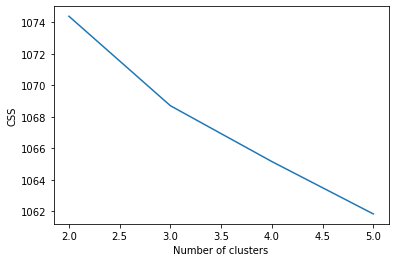

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(2, 6), css)
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()

In [13]:
# Perform cluster analysis using K-means clustering algorithm on 3 or 4
num_clusters = 3
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

# Add the cluster labels to the DataFrame
clusters = km.labels_.tolist()
positive_df['Cluster'] = clusters

# Assign names to the clusters based on the most frequent words in each cluster
cluster_names = {}
for i in range(num_clusters):
    cluster_reviews = positive_df[positive_df['Cluster'] == i]['Review_new']
    blob = TextBlob(' '.join(cluster_reviews))
    words = [word.lower() for word in blob.words if len(word) > 2]
    word_counts = {}
    for word in words:
        if word not in word_counts:
            word_counts[word] = 0
        word_counts[word] += 1
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    cluster_names[i] = ' '.join([word[0] for word in sorted_words[:10]])

# Print the DataFrame with the cluster labels and names
for i in range(num_clusters):
    print('Cluster', i, '-', cluster_names[i])
    print()


Cluster 0 - account card ride email credit time phone driver service customer

Cluster 1 - driver time car service ride dont company customer good driving

Cluster 2 - driver ride trip time charged minute charge app never fee



Topic Modeling

In [14]:
# Create a bag-of-words matrix
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(positive_df['Review_new'])

# Perform Latent Dirichlet Allocation topic modeling
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10, learning_method='online', random_state=42)
lda.fit(bow_matrix)

# Print the top 10 words for each topic
for i, topic in enumerate(lda.components_):
    print(f"Topic {i}:")
    print([vectorizer.get_feature_names()[j] for j in topic.argsort()[:-11:-1]])

Topic 0:
['wifi', 'booking', 'robert', 'bill', 'sudden', 'fee', 'unscrupulous', 'faggot', 'ueber', 'ola']
Topic 1:
['daughter', 'injury', 'eat', 'obvious', 'hospital', 'prom', 'toll', 'worry', 'height', 'joined']
Topic 2:
['gift', 'card', 'paypal', 'credit', 'last', 'night', 'purchased', 'brought', 'accept', 'sept']
Topic 3:
['kansa', 'todo', 'photo', 'addition', 'quiere', 'esta', 'beep', 'basis', 'epenses', 'senior']
Topic 4:
['data', 'debit', 'card', 'prepaid', 'danger', 'accept', 'allow', 'personal', 'gift', 'ruin']
Topic 5:
['orleans', 'new', 'street', 'ave', 'port', 'tampa', 'wife', 'god', 'airport', 'mobile']
Topic 6:
['insurance', 'account', 'rider', 'team', 'company', 'money', 'customer', 'month', 'case', 'big']
Topic 7:
['order', 'address', 'app', 'location', 'try', 'cant', 'business', 'york', 'driver', 'email']
Topic 8:
['driver', 'company', 'car', 'vehicle', 'clean', 'always', 'like', 'good', 'people', 'safe']
Topic 9:
['driver', 'ride', 'time', 'service', 'trip', 'car', 'ne

C:\Users\Sneha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Good Things with our Product-
1. good Driving
2. Phone service is good
3. People feel safe
4. Vehicle clean
5. Unsrupulus service

# Q3

Collecting all negative sentiments

In [15]:
# create a new dataframe with only positive sentiment sentences-
negative_df = df.loc[df['sentiment_score'] < 0, ['Date', 'Stars', 'Sentiment','Review','sentiment_category']]

# print the positive dataframe
print(negative_df.head(10))


                   Date  Stars Sentiment  \
0            29-10-2019      1  Negative   
4            25-10-2019      1  Negative   
6            24-10-2019      1  Negative   
7            23-10-2019      1  Positive   
8            23-10-2019      1  Negative   
9            21-10-2019      1  Negative   
12           18-10-2019      1  Positive   
15           17-10-2019      1  Negative   
18           13-10-2019      1  Positive   
19  2019-12-10 00:00:00      1  Negative   

                                               Review sentiment_category  
0   I had an accident with an Uber driver in Mexic...           Negative  
4   Uber is overcharging for Toll fees. When In Fl...           Negative  
6   I worked for Uber and Lyft for 2.5 years and a...           Negative  
7   In July of this year I had sushi delivered to ...           Negative  
8   My driver, Rohan was nice, but when I tried to...           Negative  
9   I had seven fraudulent Uber transactions over ...           N

In [16]:
# Required Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}
stop_words = set(stopwords.words('english'))
new_stop_words = ['the','and','uber','get','would','raleigh','sacca','lyft','empresa','dinero','que','got','use','used','one','youll','youve','boyfriend','mother','epect','mom','picture','sister','hello']
stop_words.update(new_stop_words)


In [17]:
# Preprocessing function
def preprocess(text):
    text = text.lower()
    text=text.strip()  #get rid of leading/trailing whitespace 
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # remove all the symbols which are not belong to this set 
    text = re.sub(r'X.*X', '', text)  # # remove all the masked words that start with 'X' and end with 'X'. 
    text = re.sub(r'x.*x', '', text)  # remove all the masked words that start with 'x' and end with 'x'.
    temp_sent =[]
    words = nltk.word_tokenize(text)
    for word in words:         # keep all the words that do not belong to stop word list and contain only alphabetic character and whose lenght is more than 2    
        lemmatized = lemmatizer.lemmatize(word)
        if lemmatized not in stop_words and lemmatized.isalpha() and len(lemmatized)>2:
            temp_sent.append(lemmatized)
    
    finalsent = ' '.join(temp_sent)
    return finalsent

negative_df["Review_new"]= negative_df["Review"].apply(preprocess) # Creating a new preprocessed column 

In [18]:
negative_df

,Date,Stars,Sentiment,Review,sentiment_category,Review_new
0,29-10-2019,1,Negative,I had an accident with an Uber driver in Mexic...,Negative,accident driver met someone asked let take dif...
4,25-10-2019,1,Negative,Uber is overcharging for Toll fees. When In Fl...,Negative,overcharging toll fee florida toll fee estimat...
6,24-10-2019,1,Negative,I worked for Uber and Lyft for 2.5 years and a...,Negative,worked year take take take driver ate mostly f...
7,23-10-2019,1,Positive,In July of this year I had sushi delivered to ...,Negative,july year sushi delivered mexico ubereats subs...
8,23-10-2019,1,Negative,"My driver, Rohan was nice, but when I tried to...",Negative,driver rohan nice tried add tip noticed switch...
...,...,...,...,...,...,...
2093,2016-02-29 00:00:00,1,Negative,My sister and I had a quick ride from one bar ...,Negative,quick ride bar another saturday night county d...
2096,2016-02-27 00:00:00,2,Negative,"I""m new to Uber 2 weeks. It's bad. Bad app, ...",Negative,new week bad bad app bad gps bad pay hour tax ...
2097,2016-02-26 00:00:00,1,Negative,My wallet was stolen out of an uber last night...,Negative,wallet stolen last night social security card ...
2099,2016-02-25 00:00:00,1,Negative,Charged me 13$ To get dropped off at airport C...,Negative,charged dropped airport could speak english dr...


Clustering

In [19]:
# Clean the reviews by removing stop words and stemming
vectorizer = TfidfVectorizer(stop_words='english')
reviews = negative_df['Review_new']
tfidf_matrix = vectorizer.fit_transform(reviews)

In [20]:
css = [] 
for i in range(2, 8): 
    kmeans = KMeans(n_clusters=i, max_iter=100, n_init=10, random_state=42).fit(tfidf_matrix)
    css.append(kmeans.inertia_)

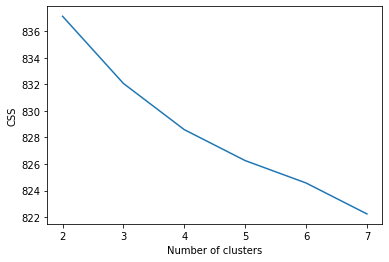

In [21]:
import matplotlib.pyplot as plt
plt.plot(range(2, 8), css)
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()

In [22]:
# Perform cluster analysis using K-means clustering algorithm on 3 or 4
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

# Add the cluster labels to the DataFrame
clusters = km.labels_.tolist()
negative_df['Cluster'] = clusters

# Assign names to the clusters based on the most frequent words in each cluster
cluster_names = {}
for i in range(num_clusters):
    cluster_reviews = negative_df[negative_df['Cluster'] == i]['Review_new']
    blob = TextBlob(' '.join(cluster_reviews))
    words = [word.lower() for word in blob.words if len(word) > 2]
    word_counts = {}
    for word in words:
        if word not in word_counts:
            word_counts[word] = 0
        word_counts[word] += 1
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    cluster_names[i] = ' '.join([word[0] for word in sorted_words[:10]])

# Print the DataFrame with the cluster labels and names
for i in range(num_clusters):
    print('Cluster', i, '-', cluster_names[i])
    print()


Cluster 0 - card credit account charge ride driver service customer time gift

Cluster 1 - charged ride driver time trip charge service fare price customer

Cluster 2 - driver service customer company car time dont ride account never

Cluster 3 - driver ride time car trip minute phone app said told



Topic Modelling

In [23]:
# Create a bag-of-words matrix
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(negative_df['Review_new'])

# Perform Latent Dirichlet Allocation topic modeling
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10, learning_method='online', random_state=42)
lda.fit(bow_matrix)

# Print the top 10 words for each topic
for i, topic in enumerate(lda.components_):
    print(f"Topic {i}:")
    print([vectorizer.get_feature_names()[j] for j in topic.argsort()[:-11:-1]])

Topic 0:
['phone', 'website', 'number', 'app', 'account', 'email', 'license', 'code', 'ask', 'contact']
Topic 1:
['water', 'hidden', 'cleaning', 'como', 'century', 'tpa', 'bottle', 'indian', 'happy', 'cleaned']
Topic 2:
['password', 'negative', 'link', 'reset', 'data', 'reporter', 'verification', 'cell', 'setting', 'stay']
Topic 3:
['support', 'business', 'company', 'dont', 'ticket', 'make', 'three', 'receive', 'time', 'issue']
Topic 4:
['percent', 'ber', 'arm', 'trained', 'happens', 'mouth', 'sprinted', 'sped', 'flawed', 'slave']
Topic 5:
['damage', 'dare', 'knowledge', 'crap', 'chicago', 'estimate', 'invite', 'altered', 'market', 'filthy']
Topic 6:
['inspection', 'dealership', 'kid', 'handle', 'leasing', 'approved', 'chennai', 'touch', 'resort', 'apartment']
Topic 7:
['hotel', 'appointment', 'driver', 'take', 'lack', 'rate', 'concert', 'leave', 'foreign', 'center']
Topic 8:
['driver', 'ride', 'time', 'car', 'service', 'customer', 'charged', 'never', 'charge', 'trip']
Topic 9:
['subur

C:\Users\Sneha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Bad Things about our Product-
1. Bad condition of Car in Canada
2. Uncooperative 
3. Booking facility horrible as compared to competition
4. Too much information asked while installing like number, email, liscene
5. Verification with code sometime fails.

# Phase 2

Take the most recent 25% of the reviews and dothe phase 1 analysis once again to understand if the findings are consistent. 

In [24]:
df = pd.read_excel('merged_review.xlsx')
df.head(10)

,Date,Stars,Sentiment,Review
0,29-10-2019,1,Negative,I had an accident with an Uber driver in Mexic...
1,28-10-2019,1,Negative,I have had my account completely hacked to whe...
2,27-10-2019,1,Negative,I requested an 8 mile ride in Boston on a Satu...
3,27-10-2019,1,Negative,I've been driving off and on with the company ...
4,25-10-2019,1,Negative,Uber is overcharging for Toll fees. When In Fl...
5,24-10-2019,1,Negative,I had an airport flight today. Uber would not ...
6,24-10-2019,1,Negative,I worked for Uber and Lyft for 2.5 years and a...
7,23-10-2019,1,Positive,In July of this year I had sushi delivered to ...
8,23-10-2019,1,Negative,"My driver, Rohan was nice, but when I tried to..."
9,21-10-2019,1,Negative,I had seven fraudulent Uber transactions over ...


In [25]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataframe by date in descending order
Uber_df_sorted = df.sort_values('Date', ascending=False)

# Calculate the number of rows in the dataframe
num_rows = Uber_df_sorted.shape[0]

# Calculate the number of rows to keep (i.e. the most recent 25%)
num_rows_to_keep = int(num_rows * 0.25)

# Take the most recent 25% of the records
Uber_df_recent = Uber_df_sorted.head(num_rows_to_keep)

C:\Users\Sneha\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29-10-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Sneha\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28-10-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Sneha\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-10-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Sneha\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25-10-2019' in DD/MM/YYYY format. Provide format or specif

In [26]:
Uber_df_recent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 19 to 525
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       526 non-null    datetime64[ns]
 1   Stars      526 non-null    int64         
 2   Sentiment  526 non-null    object        
 3   Review     526 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 20.5+ KB


In [27]:
def preprocess(text):
    text = text.lower()
    text=text.strip()  #get rid of leading/trailing whitespace 
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # remove all the symbols which are not belong to this set 
    text = re.sub(r'X.*X', '', text)  # # remove all the masked words that start with 'X' and end with 'X'. 
    text = re.sub(r'x.*x', '', text)  
    return text

Uber_df_recent["Review"]= Uber_df_recent["Review"].apply(preprocess) # Creating a new preprocessed column 

C:\Users\Sneha\AppData\Local\Temp\ipykernel_24380\156870185.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Uber_df_recent["Review"]= Uber_df_recent["Review"].apply(preprocess) # Creating a new preprocessed column


In [28]:
Uber_df_recent

,Date,Stars,Sentiment,Review
19,2019-12-10,1,Negative,uber quoted me a fare of 14 their driver turne...
77,2019-12-06,1,Negative,i am a senior citizen and i tried to sign up f...
20,2019-11-10,1,Positive,driver was fine and so was ride experience of ...
34,2019-11-09,5,Positive,the drivers are well trainedwell disciplined a...
44,2019-11-07,1,Negative,i requested a ride from fort worth south hende...
...,...,...,...,...
521,2018-06-12,1,Negative,yesterday i took an uber from union nj to stat...
522,2018-06-12,1,Negative,beware anyone who rides with uber they are dea...
523,2018-06-12,1,Negative,yesterday i took an uber from the airport 43 d...
524,2018-06-10,1,Negative,not only was my driver unable to find me we ha...


In [29]:
# Creating a new column for sentiment scores
Uber_df_recent['sentiment_score'] = Uber_df_recent['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Defining a function to categorize sentiment scores into positive, negative or neutral
def get_sentiment_category(score):
    if score > 0:
        return 'Positive'
    else:
        return 'Negative'
    

# Creating a new column for sentiment categories
Uber_df_recent['sentiment_category'] = Uber_df_recent['sentiment_score'].apply(get_sentiment_category)

# Printing the overall sentiment of the product
print('Overall sentiment:', Uber_df_recent['sentiment_category'].value_counts().idxmax())

Overall sentiment: Negative


C:\Users\Sneha\AppData\Local\Temp\ipykernel_24380\385912668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Uber_df_recent['sentiment_score'] = Uber_df_recent['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
C:\Users\Sneha\AppData\Local\Temp\ipykernel_24380\385912668.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Uber_df_recent['sentiment_category'] = Uber_df_recent['sentiment_score'].apply(get_sentiment_category)


So we can see in recent times, Uber has gotten more negative reviews. But in the whole span, they got more Postive reviews. This can be bad for company like Uber 

In [30]:
Uber_df_recent

,Date,Stars,Sentiment,Review,sentiment_score,sentiment_category
19,2019-12-10,1,Negative,uber quoted me a fare of 14 their driver turne...,-0.241250,Negative
77,2019-12-06,1,Negative,i am a senior citizen and i tried to sign up f...,-0.450000,Negative
20,2019-11-10,1,Positive,driver was fine and so was ride experience of ...,0.211111,Positive
34,2019-11-09,5,Positive,the drivers are well trainedwell disciplined a...,0.000000,Negative
44,2019-11-07,1,Negative,i requested a ride from fort worth south hende...,0.200000,Positive
...,...,...,...,...,...,...
521,2018-06-12,1,Negative,yesterday i took an uber from union nj to stat...,-0.300000,Negative
522,2018-06-12,1,Negative,beware anyone who rides with uber they are dea...,0.042857,Positive
523,2018-06-12,1,Negative,yesterday i took an uber from the airport 43 d...,-0.156250,Negative
524,2018-06-10,1,Negative,not only was my driver unable to find me we ha...,-0.075000,Negative


P2 - Q2. Collect all the positive sentiment reviews and perform topic modelling and cluster modelling on that data. 

In [31]:
# create a new dataframe with only positive sentiment sentences-
positive_df = Uber_df_recent.loc[Uber_df_recent['sentiment_score'] > 0, ['Date', 'Stars', 'Sentiment','Review','sentiment_category']]

# print the positive dataframe
positive_df.head(10)

,Date,Stars,Sentiment,Review,sentiment_category
20,2019-11-10,1,Positive,driver was fine and so was ride experience of ...,Positive
44,2019-11-07,1,Negative,i requested a ride from fort worth south hende...,Positive
112,2019-11-05,1,Negative,i use uber service at least 20 times a month i...,Positive
1,2019-10-28,1,Negative,i have had my account completely hacked to whe...,Positive
3,2019-10-27,1,Negative,ive been driving off and on with the company s...,Positive
2,2019-10-27,1,Negative,i requested an 8 mile ride in boston on a satu...,Positive
5,2019-10-24,1,Negative,i had an airport flight today uber would not a...,Positive
10,2019-10-21,1,Negative,our driver never showed up and uber cancelled ...,Positive
11,2019-10-20,1,Negative,when the service worked it was good and tech s...,Positive
13,2019-10-18,1,Negative,they didnt have cars available at bush interna...,Positive


In [32]:
# Required Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}
stop_words = set(stopwords.words('english'))
new_stop_words = ['the','and','uber','get','would','raleigh','sacca','empresa','dinero','que','got','use','used','one',
                  'youll','youve','said','first','make', 'try','take','ive', 'also', 'could', 'however', 'epect',
                 'driver', 'ride', 'car', 'charge', 'take',  'even', 'never', 'way', 'trip', 'tell', 'say']
# 'boyfriend','mother',,'mom','picture','sister','usd', 'lyft'
stop_words.update(new_stop_words)


In [35]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sneha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [36]:

stop_words = set(stopwords.words('english'))
stop_words.update(new_stop_words)


def preprocess(text):
    text = text.lower()
    text=text.strip()  #get rid of leading/trailing whitespace 
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # remove all the symbols which are not belong to this set 
    text = re.sub(r'X.*X', '', text)  # # remove all the masked words that start with 'X' and end with 'X'. 
    text = re.sub(r'x.*x', '', text)  # remove all the masked words that start with 'x' and end with 'x'.
    temp_sent =[]
    tokens = nltk.word_tokenize(text)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    words = nltk.word_tokenize(doc)
    tags = nltk.pos_tag(words)   
    for i, word in enumerate(words):
        if tags[i][1] in VERB_CODES:
            lemmatized = lemmatizer.lemmatize(word, 'v')
        else:
            lemmatized = lemmatizer.lemmatize(word)
        if lemmatized not in stop_words and lemmatized.isalpha() and len(lemmatized)>2:
            temp_sent.append(lemmatized)
    finalsent = ' '.join(temp_sent)
    return finalsent

positive_df["clean_text"]= positive_df["Review"].apply(preprocess) # Creating a new preprocessed column 

In [37]:
positive_df

,Date,Stars,Sentiment,Review,sentiment_category,clean_text
20,2019-11-10,1,Positive,driver was fine and so was ride experience of ...,Positive,fine experience deal coupon look human talk am...
44,2019-11-07,1,Negative,i requested a ride from fort worth south hende...,Positive,request fort worth south henderson street irvi...
112,2019-11-05,1,Negative,i use uber service at least 20 times a month i...,Positive,service least time month additional stop conta...
1,2019-10-28,1,Negative,i have had my account completely hacked to whe...,Positive,account completely hack sign view someone spen...
3,2019-10-27,1,Negative,ive been driving off and on with the company s...,Positive,drive company since since drive new place noti...
...,...,...,...,...,...,...
513,2018-06-23,1,Negative,i set up an uber account great or so i thought...,Positive,set account great thought service frequently a...
517,2018-06-17,1,Negative,so generally i prefer lyft over uber mainly be...,Positive,generally prefer lyft mainly time become appar...
519,2018-06-13,1,Negative,uber is a big fraud i live in qatar and visit...,Positive,big fraud live qatar visit book may update jun...
520,2018-06-13,1,Negative,i was delivering for a client when she had for...,Positive,deliver client forget put hotel room number gl...


In [38]:
# normalize_corpus = np.vectorize(normalize_document)

norm_corpus = list(positive_df['clean_text'])
norm_corpus

['fine experience deal coupon look human talk amaze find think enough hire customer service kind couldnt find human online',
 'request fort worth south henderson street irving teimum busy time',
 'service least time month additional stop contact help website helpful receive response additional stop justify turn additional amount ask time refund money add account future received response matter fact help desk keep ping without response time happen time money refund address every time add',
 'account completely hack sign view someone spend credit debit card link account dial number available safety line need wait another department email didnt hear anything almost hour prompt message help almost day still receive phone call helpful support via email nightmare worst customer service ever experience file police report person catch fraudulently account look attorney identity theft priority rectify situation end',
 'drive company since since drive new place notice fare passenger pay give dri

In [39]:
def func(n):
    return n*n

normalize = np.vectorize(func)

norm = normalize([1,2,3,4])
print(norm)

[ 1  4  9 16]


In [40]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(1, 3), min_df=25, max_df=0.9
                    )
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix.shape

(262, 37)

In [41]:
# view dense representation
# warning might give a memory error if data is too big
cv_matrix = cv_matrix.toarray()
cv_matrix
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
df = pd.DataFrame(cv_matrix, columns=vocab)
df

C:\Users\Sneha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,account,airport,app,ask,back,call,cancel,come,company,customer,...,order,pay,phone,pick,price,service,show,time,wait,want
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,5,0,0
3,3,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,...,0,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,6,0,1,0,2,0,0,0,0,0,...,0,0,3,0,0,1,2,2,0,0
258,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
260,1,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [42]:
css = [] 
for i in range(2, 6): 
    kmeans = KMeans(n_clusters=i, max_iter=100, n_init=10, random_state=42).fit(df)
    css.append(kmeans.inertia_)

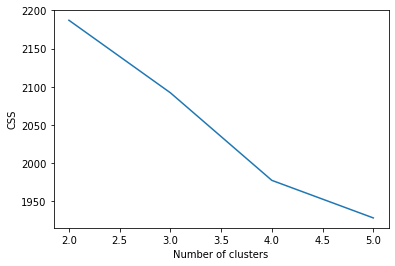

In [43]:
import matplotlib.pyplot as plt
plt.plot(range(2, 6), css)
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()

In [44]:
from sklearn.cluster import KMeans

# Let us build the first model 
NUM_CLUSTERS = 3
km1 = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(cv_matrix)
km1

KMeans(max_iter=100, n_clusters=3, n_init=15, random_state=42)

In [45]:
km1.labels_

array([1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1])

In [46]:
from collections import Counter

Counter(km1.labels_)


Counter({1: 211, 2: 19, 0: 32})

In [47]:
# Adding Cluster levels in the original dataframe 
positive_df['kmeans_cluster'] = km1.labels_
positive_df.head(10)

,Date,Stars,Sentiment,Review,sentiment_category,clean_text,kmeans_cluster
20,2019-11-10,1,Positive,driver was fine and so was ride experience of ...,Positive,fine experience deal coupon look human talk am...,1
44,2019-11-07,1,Negative,i requested a ride from fort worth south hende...,Positive,request fort worth south henderson street irvi...,1
112,2019-11-05,1,Negative,i use uber service at least 20 times a month i...,Positive,service least time month additional stop conta...,2
1,2019-10-28,1,Negative,i have had my account completely hacked to whe...,Positive,account completely hack sign view someone spen...,2
3,2019-10-27,1,Negative,ive been driving off and on with the company s...,Positive,drive company since since drive new place noti...,1
2,2019-10-27,1,Negative,i requested an 8 mile ride in boston on a satu...,Positive,request mile boston saturday night around come...,1
5,2019-10-24,1,Negative,i had an airport flight today uber would not a...,Positive,airport flight today accept credit card venmo ...,1
10,2019-10-21,1,Negative,our driver never showed up and uber cancelled ...,Positive,show cancel cancellation fee cancel dispute cr...,1
11,2019-10-20,1,Negative,when the service worked it was good and tech s...,Positive,service work good tech support respond quickly...,1
13,2019-10-18,1,Negative,they didnt have cars available at bush interna...,Positive,didnt available bush international airport oct...,1


In [48]:
Review_clusters = (positive_df[['kmeans_cluster', 'Stars']]
                  .sort_values(by=['kmeans_cluster', 'Stars'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))
#movie_clusters = movie_clusters.copy(deep=True)
Review_clusters.head(30)

,kmeans_cluster,Stars
112,2,1
1,2,1
114,2,1
65,2,1
109,2,1
185,2,1
250,2,1
251,2,1
253,2,1
257,2,1


In [49]:
feature_names = cv.get_feature_names()
topn_features = 8
ordered_centroids = km1.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
#     parks = Review_clusters[Review_clusters['kmeans_cluster'] == cluster_num]['Park'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
#     print('Popular parks:', parks)
    print('-'*80)

CLUSTER #1
Key Features: ['customer', 'service', 'cancel', 'number', 'company', 'phone', 'app', 'call']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['time', 'service', 'drive', 'app', 'airport', 'pay', 'show', 'pick']
--------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['account', 'time', 'money', 'back', 'service', 'day', 'app', 'pay']
--------------------------------------------------------------------------------


C:\Users\Sneha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Cluster 1: Uber's Customer service <br>
Cluster 2: Uber's service used for airport <br>
Cluster 3: Money back on time

# Topic Modeling

In [50]:
# Create a bag-of-words matrix
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(positive_df['clean_text'])

# Perform Latent Dirichlet Allocation topic modeling
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10, learning_method='online', random_state=42)
lda.fit(bow_matrix)

# Print the top 10 words for each topic
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}:")
    print([vectorizer.get_feature_names()[j] for j in topic.argsort()[:-11:-1]])

Topic 1:
['app', 'time', 'card', 'cancel', 'request', 'service', 'min', 'call', 'want', 'problem']
Topic 2:
['destination', 'time', 'service', 'pool', 'come', 'address', 'location', 'good', 'provide', 'pick']
Topic 3:
['account', 'pay', 'time', 'week', 'service', 'email', 'phone', 'customer', 'number', 'picture']
Topic 4:
['cancel', 'payment', 'company', 'order', 'insurance', 'credit', 'refund', 'card', 'price', 'work']
Topic 5:
['airport', 'time', 'wait', 'home', 'know', 'show', 'minute', 'last', 'call', 'good']


Topic 1: Cancelled service/ ride<br>
Topic 2: Pick and drop <br>
Topic 3: Customer Service <br>
Topic 4: Cancellation and insurance policy<br>
Topic 5: good location pickup service

        

# ## P2- Q3. Collect all the negative sentiment reviews and perform topic modelling and cluster modelling on that data.  

In [51]:
# create a new dataframe with only positive sentiment sentences-
negative_df = Uber_df_recent.loc[Uber_df_recent['sentiment_score'] < 0, ['Date', 'Stars', 'Sentiment','Review','sentiment_category']]

# print the positive dataframe
negative_df.head(10)

,Date,Stars,Sentiment,Review,sentiment_category
19,2019-12-10,1,Negative,uber quoted me a fare of 14 their driver turne...,Negative
77,2019-12-06,1,Negative,i am a senior citizen and i tried to sign up f...,Negative
111,2019-11-05,1,Negative,rates can be astronomical cancellation rates a...,Negative
6,2019-10-24,1,Negative,i worked for uber and lyft for 25 years and al...,Negative
8,2019-10-23,1,Negative,my driver rohan was nice but when i tried to a...,Negative
7,2019-10-23,1,Positive,in july of this year i had sushi delivered to ...,Negative
9,2019-10-21,1,Negative,i had seven fraudulent uber transactions over ...,Negative
12,2019-10-18,1,Positive,being a responsible driver i made the decision...,Negative
16,2019-10-14,1,Negative,upfront pricing not true pricing uber pads the...,Negative
17,2019-10-14,1,Negative,i dont believe there is any way to contact ube...,Negative


In [52]:
# Required Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}
stop_words = set(stopwords.words('english'))
new_stop_words = ['the','and','uber','get','would','raleigh','sacca','empresa','dinero','que','got','use','used','one',
                  'youll','youve','said','first','make', 'try','take','ive', 'also', 'could', 'however', 'epect','dont', 'become',
                  'set','driver', 'ride', 'car', 'charge', 'take',  'even', 'never', 'way', 'trip', 'tell', 'say', 'give']
# 'boyfriend','mother',,'mom','picture','sister','usd', 'lyft'
stop_words.update(new_stop_words)

In [53]:
stop_words = set(stopwords.words('english'))
stop_words.update(new_stop_words)


def preprocess(text):
    text = text.lower()
    text=text.strip()  #get rid of leading/trailing whitespace 
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # remove all the symbols which are not belong to this set 
    text = re.sub(r'X.*X', '', text)  # # remove all the masked words that start with 'X' and end with 'X'. 
    text = re.sub(r'x.*x', '', text)  # remove all the masked words that start with 'x' and end with 'x'.
    temp_sent =[]
    tokens = nltk.word_tokenize(text)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    words = nltk.word_tokenize(doc)
    tags = nltk.pos_tag(words)   
    for i, word in enumerate(words):
        if tags[i][1] in VERB_CODES:
            lemmatized = lemmatizer.lemmatize(word, 'v')
        else:
            lemmatized = lemmatizer.lemmatize(word)
        if lemmatized not in stop_words and lemmatized.isalpha() and len(lemmatized)>2:
            temp_sent.append(lemmatized)
    finalsent = ' '.join(temp_sent)
    return finalsent

negative_df["clean_text"]= negative_df["Review"].apply(preprocess) # Creating a new preprocessed column 

In [54]:
negative_df

,Date,Stars,Sentiment,Review,sentiment_category,clean_text
19,2019-12-10,1,Negative,uber quoted me a fare of 14 their driver turne...,Negative,quote fare turn late long route lose nearly co...
77,2019-12-06,1,Negative,i am a senior citizen and i tried to sign up f...,Negative,senior citizen sign website create account sup...
111,2019-11-05,1,Negative,rates can be astronomical cancellation rates a...,Negative,rate astronomical cancellation rate high custo...
6,2019-10-24,1,Negative,i worked for uber and lyft for 25 years and al...,Negative,work lyft year eat mostly foreign laborer ille...
8,2019-10-23,1,Negative,my driver rohan was nice but when i tried to a...,Negative,rohan nice add tip notice switch fare french q...
...,...,...,...,...,...,...
518,2018-06-14,1,Negative,got an uber me and my friends on 6918 at 303 a...,Negative,friend seat front passenger seat play music ph...
521,2018-06-12,1,Negative,yesterday i took an uber from union nj to stat...,Negative,yesterday union staten islandny allegedly spil...
523,2018-06-12,1,Negative,yesterday i took an uber from the airport 43 d...,Negative,yesterday airport dollar allegedly pour liquid...
524,2018-06-10,1,Negative,not only was my driver unable to find me we ha...,Negative,unable find wait avenue rather front build sta...


In [55]:
# normalize_corpus = np.vectorize(normalize_document)

norm_corpus = list(negative_df['clean_text'])
norm_corpus

['quote fare turn late long route lose nearly complain reduce refund money quote methis theftdo thief dishonest',
 'senior citizen sign website create account supply name email address cell phone password afterward realize correct email address thus begin vicious cycle change email address phone provide already kept ask send screenshot phone idea entail find phone customer service agent nowhere complete transaction end gogograndparent lyft prefer',
 'rate astronomical cancellation rate high customer service support unhelpful member hard understand supervisor available time wait hold beyond substandard issue hour resolve arent resolve money essentially steal passenger anyall interaction company frustrate negative',
 'work lyft year eat mostly foreign laborer illegally afraid fight back corporate crime wage theft like wouldnt believe gig economy job government need labor regulation state california example fight',
 'rohan nice add tip notice switch fare french quarter someone elses metai

In [56]:
def func(n):
    return n*n

normalize = np.vectorize(func)

norm = normalize([1,2,3,4])
print(norm)

[ 1  4  9 16]


In [63]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(1, 2), min_df=22, max_df=0.8
                    )
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix.shape

(224, 49)

In [64]:
# view dense representation
# warning might give a memory error if data is too big
cv_matrix = cv_matrix.toarray()
cv_matrix
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
idf = pd.DataFrame(cv_matrix, columns=vocab)
idf

C:\Users\Sneha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,account,another,app,ask,away,back,book,call,cancel,card,...,response,service,show,still,support,time,wait,want,work,wrong
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0,0,0,0,0,3,0,5,0,0,...,0,1,1,0,0,1,0,0,0,0
220,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
221,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
222,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,1,0,0


Clustering

In [65]:
css = [] 
for i in range(2, 6): 
    kmeans = KMeans(n_clusters=i, max_iter=100, n_init=10, random_state=42).fit(idf)
    css.append(kmeans.inertia_)

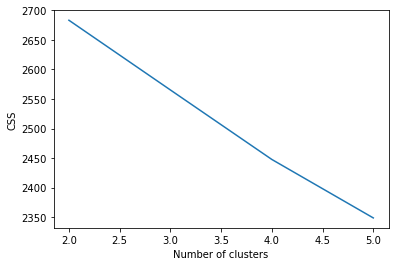

In [66]:
import matplotlib.pyplot as plt
plt.plot(range(2, 6), css)
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()

In [67]:
from sklearn.cluster import KMeans

# Let us build the first model 
NUM_CLUSTERS = 4
km1 = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(cv_matrix)
km1

KMeans(max_iter=100, n_clusters=4, n_init=15, random_state=42)

In [68]:
from collections import Counter

Counter(km1.labels_)


Counter({1: 157, 0: 11, 2: 31, 3: 25})

In [69]:
# Adding Cluster levels in the original dataframe 
negative_df['kmeans_cluster'] = km1.labels_
negative_df.head(10)

,Date,Stars,Sentiment,Review,sentiment_category,clean_text,kmeans_cluster
19,2019-12-10,1,Negative,uber quoted me a fare of 14 their driver turne...,Negative,quote fare turn late long route lose nearly co...,1
77,2019-12-06,1,Negative,i am a senior citizen and i tried to sign up f...,Negative,senior citizen sign website create account sup...,0
111,2019-11-05,1,Negative,rates can be astronomical cancellation rates a...,Negative,rate astronomical cancellation rate high custo...,2
6,2019-10-24,1,Negative,i worked for uber and lyft for 25 years and al...,Negative,work lyft year eat mostly foreign laborer ille...,1
8,2019-10-23,1,Negative,my driver rohan was nice but when i tried to a...,Negative,rohan nice add tip notice switch fare french q...,2
7,2019-10-23,1,Positive,in july of this year i had sushi delivered to ...,Negative,july year sushi deliver mexico ubereats subsid...,3
9,2019-10-21,1,Negative,i had seven fraudulent uber transactions over ...,Negative,seven fraudulent transaction three day midocto...,3
12,2019-10-18,1,Positive,being a responsible driver i made the decision...,Negative,responsible decision drink local cantina frien...,1
16,2019-10-14,1,Negative,upfront pricing not true pricing uber pads the...,Negative,upfront pricing true pricing pad bill much wai...,2
17,2019-10-14,1,Negative,i dont believe there is any way to contact ube...,Negative,believe contact yisak honda civic still pick h...,1


In [70]:
Review_clusters = (negative_df[['kmeans_cluster', 'Stars']]
                  .sort_values(by=['kmeans_cluster', 'Stars'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))
#movie_clusters = movie_clusters.copy(deep=True)
Review_clusters.head(30)

,kmeans_cluster,Stars
339,3,2
7,3,1
9,3,1
63,3,1
64,3,1
73,3,1
49,3,1
160,3,1
220,3,1
224,3,1


In [71]:
feature_names = cv.get_feature_names()
topn_features = 8
ordered_centroids = km1.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
#     parks = Review_clusters[Review_clusters['kmeans_cluster'] == cluster_num]['Park'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
#     print('Popular parks:', parks)
    print('-'*80)

CLUSTER #1
Key Features: ['phone', 'call', 'ask', 'number', 'back', 'contact', 'email', 'leave']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['time', 'drive', 'pay', 'call', 'minute', 'book', 'company', 'cancel']
--------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['customer', 'service', 'customer service', 'call', 'account', 'time', 'app', 'email']
--------------------------------------------------------------------------------
CLUSTER #4
Key Features: ['card', 'account', 'credit', 'time', 'cancel', 'app', 'company', 'didnt']
--------------------------------------------------------------------------------


C:\Users\Sneha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [72]:
# Create a bag-of-words matrix
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(negative_df['clean_text'])

# Perform Latent Dirichlet Allocation topic modeling
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10, learning_method='online', random_state=42)
lda.fit(bow_matrix)

# Print the top 10 words for each topic
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}:")
    print([vectorizer.get_feature_names()[j] for j in topic.argsort()[:-11:-1]])

Topic 1:
['drive', 'home', 'cost', 'price', 'back', 'airport', 'walmart', 'lyft', 'ever', 'like']
Topic 2:
['phone', 'app', 'call', 'service', 'customer', 'card', 'time', 'email', 'account', 'number']
Topic 3:
['time', 'drive', 'pay', 'account', 'book', 'people', 'ask', 'fee', 'fare', 'nothing']
Topic 4:
['credit', 'dollar', 'show', 'card', 'place', 'year', 'check', 'picture', 'allegedly', 'fraudulent']
Topic 5:
['location', 'minute', 'mile', 'cab', 'book', 'rider', 'premium', 'always', 'pay', 'arrival']


Topic 1: Competitor comparison : lyft <br>
Topic 2: customer service <br>
Topic 3: card, email, account, number asked<br>
Topic 4: Fraud <br>
Topic 5: premium service <br>

# Phase 3

In [73]:
df = pd.read_excel('merged_review.xlsx')
df.head(10)

,Date,Stars,Sentiment,Review
0,29-10-2019,1,Negative,I had an accident with an Uber driver in Mexic...
1,28-10-2019,1,Negative,I have had my account completely hacked to whe...
2,27-10-2019,1,Negative,I requested an 8 mile ride in Boston on a Satu...
3,27-10-2019,1,Negative,I've been driving off and on with the company ...
4,25-10-2019,1,Negative,Uber is overcharging for Toll fees. When In Fl...
5,24-10-2019,1,Negative,I had an airport flight today. Uber would not ...
6,24-10-2019,1,Negative,I worked for Uber and Lyft for 2.5 years and a...
7,23-10-2019,1,Positive,In July of this year I had sushi delivered to ...
8,23-10-2019,1,Negative,"My driver, Rohan was nice, but when I tried to..."
9,21-10-2019,1,Negative,I had seven fraudulent Uber transactions over ...


In [74]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataframe by date in descending order
Uber_df_sorted = df.sort_values('Date', ascending=False)

# Calculate the number of rows in the dataframe
num_rows = Uber_df_sorted.shape[0]

# Calculate the number of rows to keep (i.e. the most recent 25%)
num_rows_to_keep = int(num_rows * 0.25)

# Take the most recent 25% of the records
Uber_df_recent = Uber_df_sorted.head(num_rows_to_keep)

C:\Users\Sneha\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29-10-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Sneha\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28-10-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Sneha\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-10-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Sneha\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25-10-2019' in DD/MM/YYYY format. Provide format or specif

In [75]:
stop_words = stopwords.words('english')
stop_words = set(stopwords.words('english'))
new_stop_words = ['the','and','uber','get','would','raleigh','sacca','empresa','dinero','que','got','use','used','one',
                  'youll','youve','said','first','make', 'try','take','ive', 'also', 'could', 'however', 'epect','dont', 'become',
                 'take',  'even', 'never', 'way', 'trip', 'tell', 'say', 'give', 'many', 'much', 'able', 'good', 'great', 'right',
                 'really', 'sure', 'nice', 'better', 'new', 'fine', 'ho','de', 'que', 'na', 'might', 'ave', 'begin', 'think']
stop_words.update(new_stop_words)

In [76]:
def preprocess(text):
    text = text.lower()
    text=text.strip()  #get rid of leading/trailing whitespace 
    # remove all symbols except alphanumeric characters and period
    text = re.sub(r'[^\w\s.]', '', text)
    tokens = nltk.word_tokenize(text)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    return doc

Uber_df_recent["Review"]= Uber_df_recent["Review"].apply(preprocess) # Creating a new preprocessed column 

C:\Users\Sneha\AppData\Local\Temp\ipykernel_24380\2574260846.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Uber_df_recent["Review"]= Uber_df_recent["Review"].apply(preprocess) # Creating a new preprocessed column


In [77]:
# Creating a new column for sentiment scores
Uber_df_recent['sentiment_score'] = Uber_df_recent['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Defining a function to categorize sentiment scores into positive, negative or neutral
def get_sentiment_category(score):
    if score > 0:
        return 'Positive'
    else:
        return 'Negative'
    

# Creating a new column for sentiment categories
Uber_df_recent['sentiment_category'] = Uber_df_recent['sentiment_score'].apply(get_sentiment_category)

# Printing the overall sentiment of the product
print('Overall sentiment:', Uber_df_recent['sentiment_category'].value_counts().idxmax())

Overall sentiment: Negative


C:\Users\Sneha\AppData\Local\Temp\ipykernel_24380\385912668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Uber_df_recent['sentiment_score'] = Uber_df_recent['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
C:\Users\Sneha\AppData\Local\Temp\ipykernel_24380\385912668.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Uber_df_recent['sentiment_category'] = Uber_df_recent['sentiment_score'].apply(get_sentiment_category)


In [78]:
# specify the file path and name
file_path = 'output.txt'

# extract the 'text' column and write it to a file
Uber_df_recent['Review'].to_csv(file_path, header=None, index=None, sep=' ')

In [79]:
# Let us work with Trip advisor data 
text = open("C:\\Users\\Sneha\\Documents\\NLP_Uber\\output.txt", encoding="utf-8").read()


In [80]:
blob = TextBlob(text)
blob.sentiment 

Sentiment(polarity=-0.03806149138575263, subjectivity=0.44920501673028834)

In [81]:
#Display all sentences separately 
blob.sentences

[Sentence(""quoted fare ãâ14 ."),
 Sentence("driver turned late took long route lost charged nearly ãâ35 ."),
 Sentence("complained reduced ãâ26 ."),
 Sentence("refund money ãâ14 quoted me.this theft.do thieves dishonest .""),
 Sentence(""senior citizen tried sign ."),
 Sentence("went website create account ."),
 Sentence("supplied name email address cell phone password ."),
 Sentence("afterward realized correct email address ."),
 Sentence("thus began vicious cycle ."),
 Sentence("tried change email address phone provided already ."),
 Sentence("kept asking send screenshot phone ."),
 Sentence("idea entails ."),
 Sentence("find phone customer service agent ."),
 Sentence("nowhere go complete transaction ."),
 Sentence("ended going gogograndparent lyft prefer .""),
 Sentence(""driver ride ."),
 Sentence("experience dealing getting coupon ride looking human talk amazed find ."),
 Sentence("charge enough hire customer service kind ."),
 Sentence("couldnt find human online .""),
 Sentence

In [82]:
len(blob.sentences)

2887

In [83]:
# List of all sentiment words 
blist = blob.sentiment_assessments.assessments
blist

[(['late'], -0.3, 0.6, None),
 (['long'], -0.05, 0.4, None),
 (['nearly'], 0.1, 0.4, None),
 (['complained'], -0.3, 0.2, None),
 (['dishonest'], -0.3, 0.5, None),
 (['vicious'], -1.0, 1.0, None),
 (['complete'], 0.1, 0.4, None),
 (['human'], 0.0, 0.1, None),
 (['enough'], 0.0, 0.5, None),
 (['kind'], 0.6, 0.9, None),
 (['human'], 0.0, 0.1, None),
 (['worth'], 0.3, 0.1, None),
 (['exactly'], 0.25, 0.25, None),
 (['favorite'], 0.5, 1.0, None),
 (['extra'], 0.0, 0.1, None),
 (['total'], 0.0, 0.75, None),
 (['busy'], 0.1, 0.3, None),
 (['busy'], 0.1, 0.3, None),
 (['least'], -0.3, 0.4, None),
 (['less'], -0.16666666666666666, 0.06666666666666667, None),
 (['future'], 0.0, 0.125, None),
 (['high'], 0.16, 0.5399999999999999, None),
 (['hard'], -0.2916666666666667, 0.5416666666666666, None),
 (['available'], 0.4, 0.4, None),
 (['essentially'], 0.0, 0.3, None),
 (['frustrating'], -0.4, 0.9, None),
 (['negative'], -0.3, 0.4, None),
 (['properly'], 0.0, 0.1, None),
 (['unpleasant'], -0.649999999

In [84]:
nsentence = []
for p in range(len(blob.sentences)):
    if blob.sentences[p].sentiment_assessments.assessments != []:
        pl = blob.sentences[p].sentiment_assessments.assessments[0][1]
        if pl < 0:
            nsentence.append(blob.sentences[p])
            
print(nsentence[0:25])

[Sentence("driver turned late took long route lost charged nearly ãâ35 ."), Sentence("complained reduced ãâ26 ."), Sentence("refund money ãâ14 quoted me.this theft.do thieves dishonest .""), Sentence("thus began vicious cycle ."), Sentence(""service least 20 times month charged additional stop contacted help website less helpful ."), Sentence("customer service support unhelpful members hard understand ."), Sentence("anyall interactions company frustrating negative .""), Sentence("drivers conversation unpleasant ."), Sentence("foreigner curious ask brought mexico ."), Sentence("became rude asked came look mexican husband ."), Sentence("took wrong route made several requested stops ."), Sentence("someone spent 1k rides credit debit cards linked account dialed number available safety line told need wait another department emailed ."), Sentence("nightmare worst customer service ever experienced ."), Sentence("driver took toll route contact company long back issue overcharge ."), Sentence("

In [85]:
# Number of positive sentences 
len(nsentence)

553

In [86]:
senti_neg = []
for i in range(len(blist)):
    plt = blist[i][1]
    if plt > 0:
        senti_neg.append(blist[i][0])

senti_neg
#len(senti_pos)

[['nearly'],
 ['complete'],
 ['kind'],
 ['worth'],
 ['exactly'],
 ['favorite'],
 ['busy'],
 ['busy'],
 ['high'],
 ['available'],
 ['completely'],
 ['available'],
 ['experienced'],
 ['full'],
 ['quickly'],
 ['high'],
 ['barely'],
 ['relevant'],
 ['full'],
 ['nearly'],
 ['quickly'],
 ['exact'],
 ['available'],
 ['experienced'],
 ['responsible'],
 ['live'],
 ['loved'],
 ['true'],
 ['sexual'],
 ['wonderful'],
 ['touching'],
 ['happily', 'married'],
 ['exactly'],
 ['directly'],
 ['quick'],
 ['important'],
 ['lol'],
 ['live'],
 ['far'],
 ['love'],
 ['thanks'],
 ['welcome'],
 ['easy'],
 ['complete'],
 ['absolute'],
 ['ok'],
 ['confirmed'],
 ['fortunately'],
 ['complete'],
 ['top'],
 ['wants'],
 ['real'],
 ['love'],
 ['enjoy'],
 ['friendly'],
 ['far'],
 ['love'],
 ['main'],
 ['wonderful'],
 ['insanely', 'fast'],
 ['whole'],
 ['experienced'],
 ['surprised'],
 ['responsible'],
 ['action'],
 ['far'],
 ['full'],
 ['absolutely'],
 ['general'],
 ['safely'],
 ['wants'],
 ['true'],
 ['respectable'],
 

In [87]:
# Number of positive sentences 
len(nsentence)

553

In [88]:
nsenti = []
for i in range(len(senti_neg)):
    plist = senti_neg[i]
    for j in range(len(plist)):
        nsenti.append(plist[j])
    
nsenti
#len(psenti)

['nearly',
 'complete',
 'kind',
 'worth',
 'exactly',
 'favorite',
 'busy',
 'busy',
 'high',
 'available',
 'completely',
 'available',
 'experienced',
 'full',
 'quickly',
 'high',
 'barely',
 'relevant',
 'full',
 'nearly',
 'quickly',
 'exact',
 'available',
 'experienced',
 'responsible',
 'live',
 'loved',
 'true',
 'sexual',
 'wonderful',
 'touching',
 'happily',
 'married',
 'exactly',
 'directly',
 'quick',
 'important',
 'lol',
 'live',
 'far',
 'love',
 'thanks',
 'welcome',
 'easy',
 'complete',
 'absolute',
 'ok',
 'confirmed',
 'fortunately',
 'complete',
 'top',
 'wants',
 'real',
 'love',
 'enjoy',
 'friendly',
 'far',
 'love',
 'main',
 'wonderful',
 'insanely',
 'fast',
 'whole',
 'experienced',
 'surprised',
 'responsible',
 'action',
 'far',
 'full',
 'absolutely',
 'general',
 'safely',
 'wants',
 'true',
 'respectable',
 'significant',
 'important',
 'easily',
 'original',
 'comfortable',
 'absolute',
 'social',
 'nearly',
 'absolute',
 'absolutely',
 'exactly',


In [89]:
len(set(nsenti))

215

In [90]:
ngram_freq = nltk.FreqDist() #WE INITIALIZED A FREQUENCY COUNTER

for ngram in nltk.ngrams(nsenti, 1):
    ngram_freq[ngram] += 1
ngram_freq.most_common(238)

[(('far',), 22),
 (('clean',), 19),
 (('kind',), 18),
 (('love',), 18),
 (('available',), 17),
 (('easy',), 15),
 (('live',), 14),
 (('friendly',), 14),
 (('confirmed',), 13),
 (('worth',), 12),
 (('high',), 12),
 (('full',), 12),
 (('safe',), 12),
 (('apparently',), 11),
 (('courteous',), 11),
 (('early',), 11),
 (('complete',), 10),
 (('experienced',), 10),
 (('absolutely',), 10),
 (('happy',), 10),
 (('fair',), 10),
 (('quick',), 9),
 (('higher',), 9),
 (('old',), 9),
 (('completely',), 8),
 (('exact',), 8),
 (('ok',), 8),
 (('fast',), 8),
 (('positive',), 8),
 (('light',), 8),
 (('huge',), 8),
 (('pretty',), 8),
 (('nearly',), 7),
 (('quickly',), 7),
 (('social',), 7),
 (('aware',), 7),
 (('exactly',), 6),
 (('busy',), 6),
 (('important',), 6),
 (('top',), 6),
 (('wants',), 6),
 (('real',), 6),
 (('clearly',), 6),
 (('excellent',), 6),
 (('true',), 5),
 (('wonderful',), 5),
 (('directly',), 5),
 (('thanks',), 5),
 (('smart',), 5),
 (('best',), 5),
 (('reasonable',), 5),
 (('general

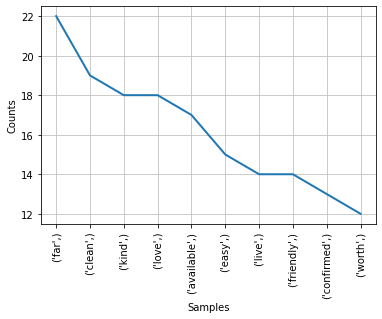

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [91]:
ngram_freq.plot(10)

In [92]:
# find all sentences that contain a critical phrase
matches = []
for sentence in df['Review']:
    for phrase in nsenti:
        if phrase in sentence.lower():
            matches.append(sentence)
            break

# print the matched sentences
for match in matches:
    print(match)

I had an accident with an Uber driver in Mexico City. The car that I got into had no side mirror. The Brakes were not working properly either. I almost got into an accident twice. The driver's conversation was unpleasant. Being a foreigner he was very curious to ask where I am from and what brought me to Mexico. I replied to be a tourist and through that conversation is over. He became very rude and asked me if I came to look for a Mexican husband. I never answered and kept quiet. He took the wrong route and made several in requested stops. Having in mind it was uberX. He continued asked me whom I sleep with. He literally stopped the car and asked me to wait for him text someone. I asked him to let me go and take a different driver but he locked the doors and didn't allow me. 
I have had my account completely hacked to where I cannot sign in or view it. Someone spent over $1k in Uber rides on my credit and debit cards linked to the account and when I dialed the only number available (s

In [93]:
# Preprocessing function
def preprocess(text):
    text = text.lower()
    text=text.strip()  #get rid of leading/trailing whitespace 
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # remove all the symbols which are not belong to this set 
    text = re.sub(r'X.*X', '', text)  # # remove all the masked words that start with 'X' and end with 'X'. 
    text = re.sub(r'x.*x', '', text)  # remove all the masked words that start with 'x' and end with 'x'.
    temp_sent =[]
    tokens = nltk.word_tokenize(text)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    words = nltk.word_tokenize(doc)
    tags = nltk.pos_tag(words)   
    for i, word in enumerate(words):
        if tags[i][1] in VERB_CODES:
            lemmatized = lemmatizer.lemmatize(word, 'v')
        else:
            lemmatized = lemmatizer.lemmatize(word)
        if lemmatized not in stop_words and lemmatized.isalpha() and len(lemmatized)>2:
            temp_sent.append(lemmatized)
    finalsent = ' '.join(temp_sent)
    return finalsent

if type(matches) == list:
    matches = pd.DataFrame(matches, columns=['Column_Name'])
matches['Preprocessed_Column'] = matches['Column_Name'].apply(preprocess)

In [95]:
# Create a bag-of-words matrix
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(matches['Preprocessed_Column'])

# Perform Latent Dirichlet Allocation topic modeling
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10, learning_method='online', random_state=42)
lda.fit(bow_matrix)

# Print the top 10 words for each topic
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}:")
    print([vectorizer.get_feature_names()[j] for j in topic.argsort()[:-11:-1]])

Topic 1:
['south', 'lane', 'fort', 'insurance', 'lauderdale', 'basis', 'training', 'cheaper', 'betty', 'michigan']
Topic 2:
['fraud', 'cheap', 'fire', 'opinion', 'idea', 'decline', 'business', 'review', 'story', 'stress']
Topic 3:
['card', 'account', 'ride', 'app', 'credit', 'charge', 'email', 'price', 'phone', 'surge']
Topic 4:
['safe', 'safety', 'damage', 'woman', 'transportation', 'vehicle', 'city', 'nyc', 'year', 'hotel']
Topic 5:
['driver', 'time', 'charge', 'ride', 'car', 'service', 'drive', 'call', 'customer', 'company']


Topic 1: Airport ride
Topic 2: Customer service
Topic 3: price surge
Topic 4: credit card charged
Topic 5: Accident and insurancex

# Phase 4

Pre processing the whole dataframe

In [119]:
'''# Required Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}
stop_words = set(stopwords.words('english'))
new_stop_words = ['place', 'park','Kolkata','kolkata','visit','bridge','one','time','also']
stop_words.update(new_stop_words)
'''

"# Required Preprocessing\nlemmatizer = WordNetLemmatizer()\nstop_words = stopwords.words('english')\nVERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}\nstop_words = set(stopwords.words('english'))\nnew_stop_words = ['place', 'park','Kolkata','kolkata','visit','bridge','one','time','also']\nstop_words.update(new_stop_words)\n"

In [120]:
'''# Preprocessing function
def preprocess(text):
    text = text.lower()
    text=text.strip()  #get rid of leading/trailing whitespace 
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # remove all the symbols which are not belong to this set 
    text = re.sub(r'X.*X', '', text)  # # remove all the masked words that start with 'X' and end with 'X'. 
    text = re.sub(r'x.*x', '', text)  # remove all the masked words that start with 'x' and end with 'x'.
    temp_sent =[]
    words = nltk.word_tokenize(text)
    for word in words:         # keep all the words that do not belong to stop word list and contain only alphabetic character and whose lenght is more than 2    
        lemmatized = lemmatizer.lemmatize(word)
        if lemmatized not in stop_words and lemmatized.isalpha() and len(lemmatized)>2:
            temp_sent.append(lemmatized)
    
    finalsent = ' '.join(temp_sent)
    return finalsent

df["Review_new"]= df["Review"].apply(preprocess) # Creating a new preprocessed column '''

'# Preprocessing function\ndef preprocess(text):\n    text = text.lower()\n    text=text.strip()  #get rid of leading/trailing whitespace \n    text = re.sub(r\'[^a-zA-Z0-9\\s]\', \'\', text) # remove all the symbols which are not belong to this set \n    text = re.sub(r\'X.*X\', \'\', text)  # # remove all the masked words that start with \'X\' and end with \'X\'. \n    text = re.sub(r\'x.*x\', \'\', text)  # remove all the masked words that start with \'x\' and end with \'x\'.\n    temp_sent =[]\n    words = nltk.word_tokenize(text)\n    for word in words:         # keep all the words that do not belong to stop word list and contain only alphabetic character and whose lenght is more than 2    \n        lemmatized = lemmatizer.lemmatize(word)\n        if lemmatized not in stop_words and lemmatized.isalpha() and len(lemmatized)>2:\n            temp_sent.append(lemmatized)\n    \n    finalsent = \' \'.join(temp_sent)\n    return finalsent\n\ndf["Review_new"]= df["Review"].apply(preproce

In [121]:
# Define a function to clean and preprocess the text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuations and special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Stem the words
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Join the tokens back into a single string
    text = ' '.join(tokens)
    
    return text

# Apply the clean_text function to the review column
new_df['Review_new'] = new_df['Review'].apply(clean_text)

In [122]:
new_df

,Date,Stars,Sentiment,Review,Review_new,sentiment_score,sentiment_category
0,29-10-2019,1,Negative,I had an accident with an Uber driver in Mexic...,accid uber driver mexico citi car got side mir...,-0.185556,Negative
1,28-10-2019,1,Negative,I have had my account completely hacked to whe...,account complet hack sign view someon spent 1k...,0.033333,Positive
2,27-10-2019,1,Negative,I requested an 8 mile ride in Boston on a Satu...,request 8 mile ride boston saturday night arou...,0.053333,Positive
3,27-10-2019,1,Negative,I've been driving off and on with the company ...,ive drive compani sinc 2016 sinc drive new pla...,0.363939,Positive
4,25-10-2019,1,Negative,Uber is overcharging for Toll fees. When In Fl...,uber overcharg toll fee florida toll fee estim...,-0.016667,Negative
...,...,...,...,...,...,...,...
2102,2016-02-23 00:00:00,1,Positive,Wow! Where do I begin?! I applied to be a driv...,wow begin appli driver wait wait waitedwait co...,0.059375,Positive
2103,2016-02-22 00:00:00,2,Positive,The first time ever in my life that I used ...,first time ever life use uber chitown new year...,0.209773,Positive
2104,2016-02-22 00:00:00,4,Negative,Short trip take a cab. Longer run out of town...,short trip take cab longer run town airport uber,0.000000,Negative
2105,2016-02-21 00:00:00,1,Positive,If you are contemplating driving for Uber in N...,contempl drive uber nj think againmayb 3x ask ...,0.176061,Positive


In [123]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(new_df['Review_new'], new_df['sentiment_category'], random_state=42)

# Convert text data into numerical data using count vectorization
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the model using Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict the sentiment of the reviews in the test dataset
y_pred = clf.predict(X_test)

# Evaluate the performance of the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the classification model is: {:.2f}%".format(accuracy*100))


Accuracy of the classification model is: 72.68%


In [124]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(new_df['Review_new'], new_df['Sentiment'], random_state=42)

# Convert text data into numerical data using count vectorization
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the model using Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict the sentiment of the reviews in the test dataset
y_pred = clf.predict(X_test)

# Evaluate the performance of the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the classification model is: {:.2f}%".format(accuracy*100))


Accuracy of the classification model is: 80.46%


Manually predicted Sentiment have higher accuracy, i.e. of 80.46% whereas classifier based on Sentiment analyser (Textblob) has lower accuracy i.e. of 72.86%.